# **Passos da Análise de Crédito**
1. **Distribuição de Idade e Salário :**

• São criados dois histogramas, um para idade e outro para salário, com linhas de densidade (KDE) para uma visão suave das distribuições.

• O gráfico é separado em duas subparcelas, e cada variável é plotada com uma cor diferente.

2. **Análise do Histórico de Crédito :**

• Um gráfico de barras é gerado para mostrar a quantidade de clientes por categoria de histórico de crédito.

• Isso permite visualizar quais históricos de crédito são mais comuns entre os clientes.
3. **Matriz de Correlação Simplificada :**

• Exibe uma matriz de observação entre as variáveis ​​numéricas principais.

**•** O gráfico de calor (heatmap) mostra o brilho entre idade, salário, renda familiar, dívida total e dias de atraso, destacando a força e o sentido da relação entre essas variáveis.

4. **Dívida por Histórico de Crédito :**

• Um gráfico de barras exibe a dívida média de acordo com o histórico de crédito dos clientes.

• Isso ajuda a ver clientes com diferentes históricos de crédito que tendem a ter dívidas médias distintas.

5. **Dias de Atraso Médio por Histórico de Crédito :**

• Outro gráfico de barras mostra a mídia de dias de atraso também por categoria de histórico de crédito.

• Essa análise indica se existe uma relação entre o histórico de crédito e a pontualidade no pagamento.

6. **Relação entre Dívida Total e Dias de Atraso :**

• Um gráfico de dispersão apresenta a relação entre dívida total e dias de atraso, com núcleos diferentes representando o histórico de crédito.

• Isso permite observar se existe uma relação entre o valor da dívida e a quantidade de dias em atraso.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregar os dados
dados = pd.read_csv('dados_analise_credito.csv')

In [30]:
dados.head()

,id_cliente,nome,idade,salario,renda_familia,anos_trabalho,possui_imovel,historico_credito,divida_total,dias_atraso,num_dependentes
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Michael Stephens,56,5622.16,4048.25,2,1,Bom,2817.64,50,0
1,23b8c1e9-3924-46de-beb1-3b9046685257,Heather Sanders,69,4532.47,8107.28,21,1,Regular,10796.87,47,4
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Bryan Charles,46,1980.63,4101.20,5,1,Bom,13004.00,20,2
3,972a8469-1641-4f82-8b9d-2434e465e150,Matthew May,32,3015.77,11264.76,1,1,Bom,6809.20,119,1
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Alison Buchanan,60,4766.91,6986.64,22,1,Ruim,12321.48,21,3


In [4]:
# Configurações de estilo dos gráficos
sns.set(style="whitegrid", palette="muted")

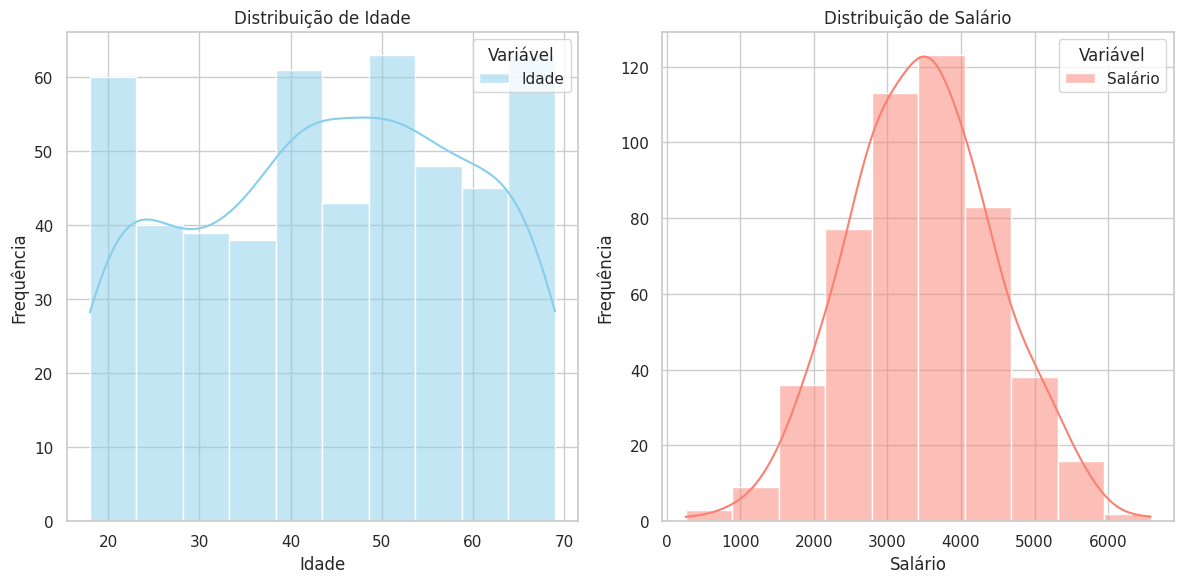

In [19]:
# 1. Distribuição de Idade e Salário (Gráficos Separados)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(dados['idade'], bins=10, kde=True, color="skyblue", label="Idade")
plt.title("Distribuição de Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend(title="Variável")

plt.subplot(1, 2, 2)
sns.histplot(dados['salario'], bins=10, kde=True, color="salmon", label="Salário")
plt.title("Distribuição de Salário")
plt.xlabel("Salário")
plt.ylabel("Frequência")
plt.legend(title="Variável")

plt.tight_layout()
plt.show()

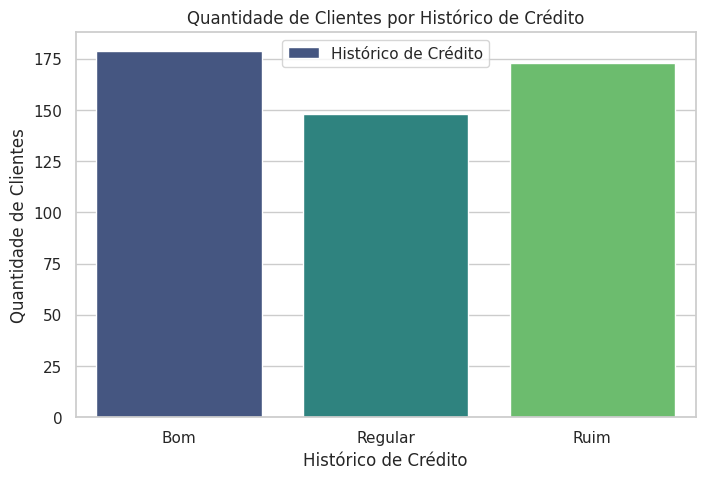

In [31]:
# 2. Análise do Histórico de Crédito (Gráfico de Barras)
plt.figure(figsize=(8, 5))
sns.countplot(data=dados, x="historico_credito", hue="historico_credito", dodge=False, palette="viridis", legend=False)
plt.title("Quantidade de Clientes por Histórico de Crédito")
plt.xlabel("Histórico de Crédito")
plt.ylabel("Quantidade de Clientes")
plt.legend(["Histórico de Crédito"])

plt.show()

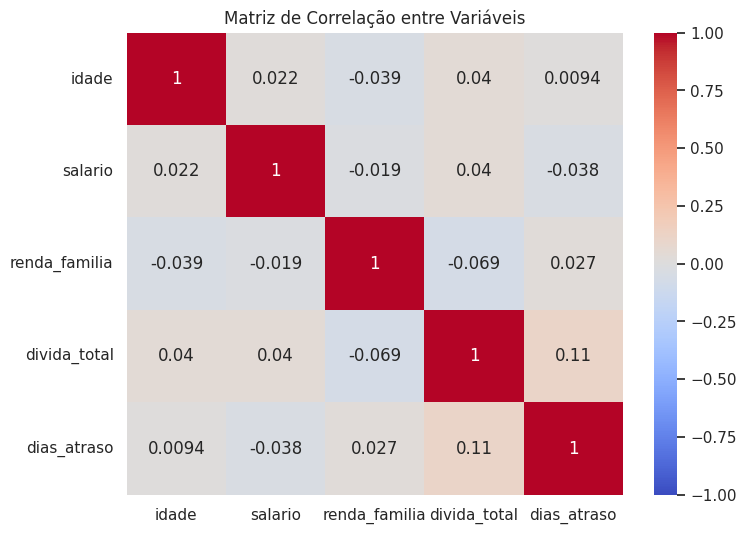

In [22]:
# 3. Matriz de Correlação Simplificada
plt.figure(figsize=(8, 6))
correlacoes = dados[['idade', 'salario', 'renda_familia', 'divida_total', 'dias_atraso']].corr()
sns.heatmap(correlacoes, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

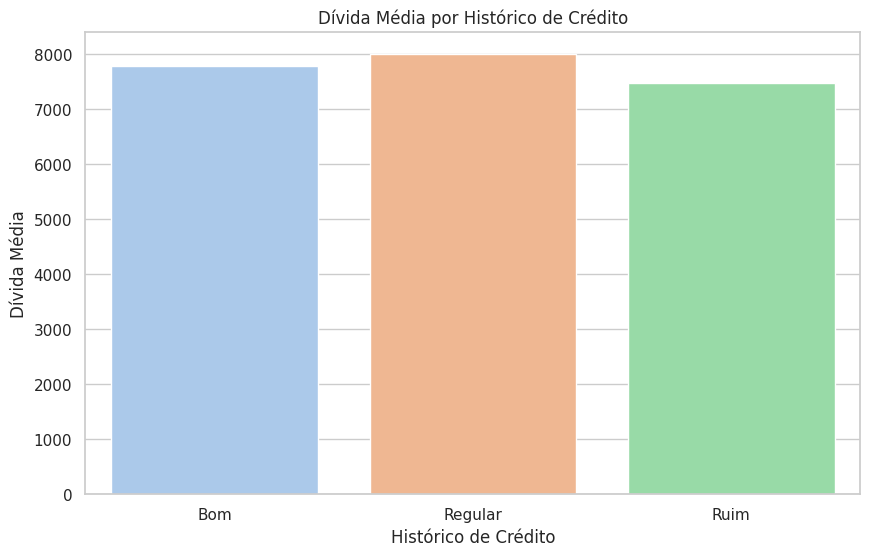

In [35]:
# 4. Dívida por Histórico de Crédito (Gráfico de Barras)
plt.figure(figsize=(10, 6))
sns.barplot(data=dados, x="historico_credito", y="divida_total", hue="historico_credito", estimator=np.mean, errorbar=None, palette="pastel", legend=False)
plt.title("Dívida Média por Histórico de Crédito")
plt.xlabel("Histórico de Crédito")
plt.ylabel("Dívida Média")

plt.show()

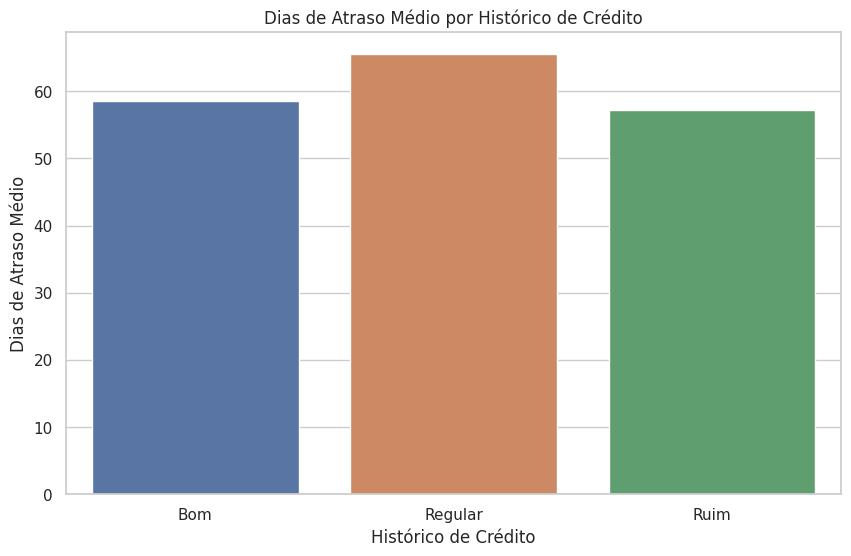

In [36]:
# 5. Dias de Atraso Médio por Histórico de Crédito (Gráfico de Barras)
plt.figure(figsize=(10, 6))
sns.barplot(data=dados, x="historico_credito", y="dias_atraso", hue="historico_credito", estimator=np.mean, errorbar=None, palette="deep", legend=False)
plt.title("Dias de Atraso Médio por Histórico de Crédito")
plt.xlabel("Histórico de Crédito")
plt.ylabel("Dias de Atraso Médio")

plt.show()

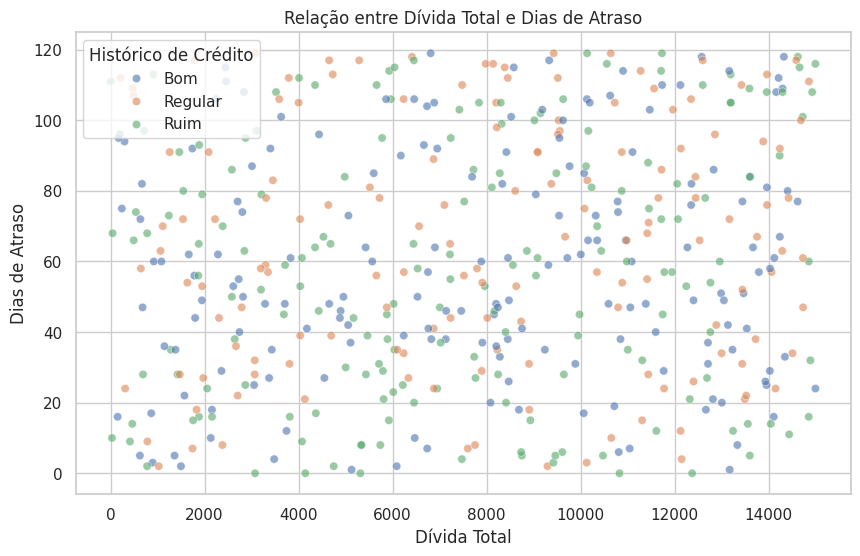

In [27]:
# 6. Relação entre Dívida Total e Dias de Atraso (Gráfico de Dispersão)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x="divida_total", y="dias_atraso", hue="historico_credito", palette="deep", alpha=0.6)
plt.title("Relação entre Dívida Total e Dias de Atraso")
plt.xlabel("Dívida Total")
plt.ylabel("Dias de Atraso")
plt.legend(title="Histórico de Crédito")

plt.show()

# **Resumo dos Resultados e Insights**
Após explorar o conjunto de dados, chegamos a alguns insights:

1. **Perfil dos Clientes:** A maior parte dos clientes está em uma faixa etária média e possui uma renda moderada. A maioria possui histórico de crédito "Regular" ou "Bom".

2. **Risco Associado ao Histórico de Crédito:** Clientes com histórico "Ruim" tendem a ter maior dívida e mais dias de atraso, sugerindo que o histórico de crédito pode ser um bom indicador de risco.

3. **Correlação entre Dívida e Atrasos:** A dívida total está positivamente correlacionada com os dias de atraso, indicando que clientes mais endividados têm maior probabilidade de atrasar.

Essas descobertas podem auxiliar na criação de um modelo de pontuação de crédito que considere o histórico e o nível de dívida para identificar perfis de maior risco.